In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')
df=pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
df

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [2]:
def preprocess_text(text):
  tokens=word_tokenize(text.lower())

  filtered_tokens=[token for token in tokens if token not in stopwords.words('english')]

  lemmatizer=WordNetLemmatizer()

  lemmatized_token=[lemmatizer.lemmatize(token) for token in filtered_tokens]

  processed_token=' '.join(lemmatized_token)

  return processed_token

In [3]:

df['reviewText'] = df['reviewText'].apply(preprocess_text)
df

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,love love love app side fashion story fight wo...,1


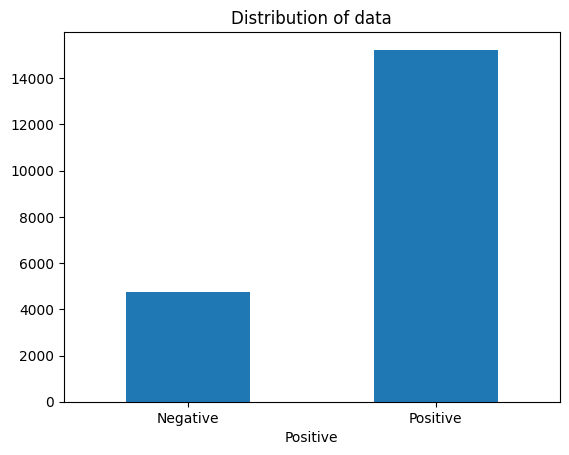

,reviewText
Positive,
0,4767
1,15233


In [5]:
import matplotlib.pyplot as plt
ax = df.groupby('Positive').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)
plt.show()
group = df.groupby('Positive').count()

#--- Inspect data ---
group

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['reviewText'],df['Positive'],test_size=0.05, random_state=0)
X_train, X_test, y_train, y_test

(6680     used using creader pc read comic , dismayed se...
 6269     u boring . might worth playing rewarded pocket...
 3309     force closing . new update work . using moto x...
 12840    great little app kid like lot - drive adult nu...
 9011     defragging solid state memory bad thing . seco...
                                ...                        
 13123    care app , special reason , like . n't like fe...
 19648    froze kindle fire could n't exit . likly bug f...
 9845     installed easily setup three event . love youn...
 10799    great game want mess around want get better ac...
 2732     cbs viewer everything ; including news . great...
 Name: reviewText, Length: 19000, dtype: object,
 19134    really like site really keep posted people sit...
 4981     good app . one use time , definitely worth mon...
 16643    3 year old twin grandson love app . play daily...
 19117    one better editing program android . work well...
 5306     game mentaly challenging help keep toe . 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
vectoriser.fit(X_train)

X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [10]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
BNBmodel = BernoulliNB(alpha=2)
BNBmodel.fit(X_train, y_train)
y_pred = BNBmodel.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.89

In [11]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC(dual=True)
SVCmodel.fit(X_train, y_train)
y_pred = SVCmodel.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

0.897

In [12]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
accuracy3

0.906

In [14]:
text = ["I hate twitter",
        "I hate this shit",
        "Mr. Stark, I am not feeling well."]

textdata = vectoriser.transform(text)
sentiment = LRmodel.predict(textdata)

data = []
for text, pred in zip(text, sentiment):
    data.append((text, pred))
# Convert the list into a Pandas DataFrame.
df = pd.DataFrame(data, columns=['text', 'sentiment'])
df = df.replace([0, 1], ["Negative", "Positive"])
df

,text,sentiment
0,I hate twitter,Negative
1,I hate this shit,Negative
2,"Mr. Stark, I am not feeling well.",Positive
